In [88]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

In [89]:
sigmoide = lambda x : 2/(1+np.exp(-x))-1
signo = lambda x:np.sign(x)
sinc = lambda x:np.sinc(x)
exponencial = lambda x:np.exp(x)

deriv_sigmoide = lambda x : (2 * np.exp(-x))/np.square(1+np.exp(-x))


class perceptron(object):
    
    y_deseada = 0
    
    
    def __init__(self, n_entradas, fun_act=sigmoide, deriv_fun_act=deriv_sigmoide, x_0 = -1, vel_aprend=0.002):
        
        self.W = np.random.rand(n_entradas+1,1)
        self.X = np.ones(n_entradas+1)
        self.X[0]=x_0
        
        self.y_ultima = 0
        
        #self.y_ok=False
        self.mu=vel_aprend
        
        self.func = fun_act
        self.deriv = deriv_fun_act
        
    def entrada(self,x):
        self.X[1::] = x
        return
        
    def propago(self):
        self.y_ultima = self.func(self.W.T @ self.X)
        return self.y_ultima
    
    def salida_deseada(self,y_d):
        self.y_deseada = y_d
        return
    
    def retropropago(self):
        
        #delta_W = self.mu* 2 * (self.y_deseada-self.y_ultima)*(1+self.y_ultima)*(1-self.y_ultima)*self.X
        delta_W = 2*self.mu*(self.y_deseada-self.y_ultima)*self.X
        W_nueva = self.W.T + delta_W
        self.W = W_nueva.T
        return
        
    

In [90]:
data = np.loadtxt("dataset.txt")



In [91]:
pts_A = data[0:299,:]
pts_A[:,0:2]

pts_B = data[300:599,:]
pts_B[:,0:2];

In [92]:
neuro = perceptron(2,fun_act=sigmoide)

for i in range(1000):
    for v in pts_A[:,0:2]:
        neuro.entrada(v)
        neuro.propago()
        neuro.salida_deseada(1)
        neuro.retropropago()
    
for v in pts_B[:,0:2]:
        neuro.entrada(v)
        neuro.propago()
        neuro.salida_deseada(-1)
        neuro.retropropago()

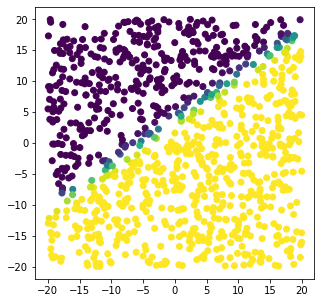

In [93]:

prueba_x = np.random.rand(1000)*40-20
prueba_y = np.random.rand(1000)*40-20

k=[]
for i in range(len(prueba_x)):
    neuro.entrada([prueba_x[i],prueba_y[i]])
    k.append(neuro.propago()[0])


color = ['r','k','b']
pl.figure(figsize=(5,5))
pl.scatter(prueba_x,prueba_y,c=k);

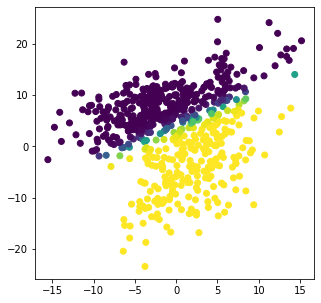

In [101]:
prueba_x = np.random.rand(1000)*40-20
prueba_y = np.random.rand(1000)*40-20

k=[]
for i in range(len(data)):
    neuro.entrada([data[i][0],data[i][1]])
    k.append(neuro.propago()[0])


color = ['r','k','b']
pl.figure(figsize=(5,5))
pl.scatter(data[:,0],data[:,1],c=k);